# Домашнее задание 2 - предобработка признаков, pandas


### О задании

Практическое задание 2 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.


### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы, которые позднее будут учитываться при проставлении оценок автоматом по курсу.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания получившийся файл \*.ipynb с решением необходимо выложить в свой репозиторий github.

#### 1) Что такое OneHot кодирование и StandardScaler из библиотеки sklearn, для чего и для каких типов данных их имеет смысл применять?

OneHot кодирование - приведение категориальных признаков к численному типу, состоящему из 0 и 1. Для OneHot-кодирования можно использоваться функцию `get_dummies` из библиотеки pandas или `DictVectorizer` из библиотеки sklearn.

Пример:

In [11]:
import pandas as pd

dataset = pd.Series(list('abcd'))
dataset

0    a
1    b
2    c
3    d
dtype: object

In [12]:
dataset = pd.get_dummies(dataset, dtype=int)
dataset

,a,b,c,d
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1


`StandardScaler` из библиотеки sklearn применяется для масштабирования данных. Нужно это в том случае, когда в датасете имеются данные разных масштабов. Например, значения одного признака лежат в диапазоне от 0 до 10, а значения другого признака в диапазоне от 1000 до 100 000. В задачах, где мы используем метрики, модель на таких данных может обучаться неверно. Масштабирование же приводит все данные примерно к одному масштабу. 

#### 2) Что такое коэффициент корреляции Пирсона?

$$R (X, y) = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n \sqrt{(x_i - \bar{x})^2} \sum_{i=1}^n \sqrt{(y_i - \bar{y})^2}}$$

Коэффициент Пирсона - коэффициент корреляции, который измеряет линейную корреляцию между двумя наборами данных. Это отношение ковариации двух данных на произведение стандартных отклонений этих данных.

#### 3) Что такое линейная регрессия, чем отличаются LinearRegression, Ridge и Lasso из библиотеки sklearn?

Линейная регрессия - метод машинного обучения, который предсказывает данные с помощью линейной функции:
$$a(x) = <x, w> + b$$ 

В отличие от `LinearRegression` в методах `Lasso` и `Ridge` из библиотеки sklearn используется регуляризация. Регуляризация помогает избежать переобучения. Без нее модель может хорошо обучиться на обучающей выборке, но выдать совсем другие результаты на тестовой. Если у модели слишком высокие веса, то она получает штраф, равный абсолютному знацению вектора весов для L-1 (Lasso) регуляризации или же квадрату нормы для L-2 (Ridge) регуляризации.

#### 4) Что такое кроссвалидация? Что делает GridsSearchCV из sklearn? 

Кросс-валидация - это метод измерения точности модели. Суть метода заключается в разделение всей выборки на n частей. Дальше модель обучают на одной из выборок, а проверяют ее точность на n-1 тестовых выборка. Получаем n моделей, из которых можем выбрать лучшую.

GridsSearchCV помогает найти лучшие параметры для выборки. В GridsSearchCV задаются массив параметров, среди которых требуется найти лучшие значения, модель машинного обучения, метрики, по которым будет считаться ошибка, число разбиений выборки для кросс-валидации. 

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [1]:
import numpy as np

**1. (0.2 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [2]:
def max_element(arr):
    if np.prod(arr) == 0:
        return np.max(x[1:][(x==0)[:-1]])

    return None

Проверка:

In [3]:
x = np.random.randint(5, size=10)
print(f'array: {x} \nresult: {max_element(x)}')

array: [2 3 1 0 3 3 4 4 0 3] 
result: 3


**2. (0.2 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [9]:
def nearest_value(X, v):
    indices= np.where(abs(X - v) == abs(X - v).min())
    return X[indices][0]

Проверка:

In [10]:
X = np.random.randint(10, size=10).reshape((2, 5))
v = round(np.random.uniform(5), 1)

print(f'matrix X:\n{X}\nnearest value for value {v}: {nearest_value(X,v)}')

matrix X:
[[3 1 2 9 4]
 [8 9 6 1 6]]
nearest value for value 4.3: 4


**3. (0.2 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [11]:
def scale(X):
    mn = np.mean(X, axis = 0)
    sd = np.std(X, axis = 0)
    sd[sd == 0] = 1
    A = (X - mn) / sd
    return A

Проверка:

In [12]:
X = np.random.randint(100, size=20).reshape((4, 5))
print(f'matrix X:\n{X}\n\nscaling of matrix X:\n{scale(X)}')

matrix X:
[[10 35 71  9 39]
 [80 98 92 70 10]
 [63 42 68 23 91]
 [56 97  4 76 21]]

scaling of matrix X:
[[-1.63081532 -1.11464861  0.37194932 -1.22395602 -0.0402246 ]
 [ 1.07112722  1.01331692  1.00957673  0.87917968 -0.97343526]
 [ 0.41494118 -0.878208    0.28085969 -0.74126914  1.63311866]
 [ 0.14474692  0.97953969 -1.66238574  1.08604549 -0.6194588 ]]


**4. (0.2 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [13]:
def get_stats(X):
    det = round(np.linalg.det(X))
    trace = np.trace(X)
    vmax = np.max(X)
    vmin = np.min(X)
    frob = np.linalg.norm(X, ord = 'fro')
    eig = np.linalg.eig(X)
    inver = np.linalg.inv(X)
    return (det, trace, vmax, vmin, frob, eig, inver)

Проверка:

In [14]:
X = np.random.normal(10, size=9).reshape((3, 3))
det, trace, vmax, vmin, frob, eig, inver = get_stats(X)

print(f'matrix X:\n{X}\n\ndeterminant:{det}\ntrace:{trace}\nmax value:{vmax}\n\
min value:{vmin}\nFrobenius norm:{frob}\neigenvalues:\n{eig}\ninverse matrix:\n{inver}')

matrix X:
[[ 7.44361633 11.14885397  8.35889014]
 [10.83623447  9.03786563  9.12142656]
 [10.93033355 10.84520334  9.22347489]]

determinant:38
trace:25.70495685393233
max value:11.148853965300273
min value:7.443616331414685
Frobenius norm:29.224064470177385
eigenvalues:
EigResult(eigenvalues=array([28.92448914, -2.74019076, -0.47934152]), eigenvectors=array([[-0.53828919, -0.7955738 , -0.41203848],
       [-0.57564173,  0.56734918, -0.3407614 ],
       [-0.61553338,  0.21254939,  0.8450479 ]]))
inverse matrix:
[[-0.40964468 -0.32052349  0.68822287]
 [-0.00651459 -0.59774376  0.59703426]
 [ 0.49311188  1.08268102 -1.4091721 ]]


**5. (0.2 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [15]:
vmax = []

for exp_num in range(100):
    matrix_1 = np.random.normal(0, 1, (10, 10))
    matrix_2 = np.random.normal(0, 1, (10, 10))
    multiply_resul = np.matmul(matrix_1, matrix_2)
    vmax.append(np.max(multiply_resul))

print(f'mean: {np.mean(vmax)}')

mean: 8.770513381814716


### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

Данные находятся в приложенном файле `2008.csv`. Их [описание](http://stat-computing.org/dataexpo/2009/the-data.html) приведено ниже:

Airline on-time performance

Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is your chance to find out.

The data
The data set is available for download here.
The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed.

Understanding and preparing the data
In order to answer above questions, we are going to analyze the provided dataset, containing up to 1936758 ### different internal flights in the US for 2008 and their causes for delay, diversion and cancellation

The data comes from the U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics (BTS). Meta data explanations

This dataset is composed by the following variables:

**Year** 2008 **Month** 1-12 **DayofMonth** 1-31 **DayOfWeek** 1 (Monday) - 7 (Sunday)  
**DepTime** actual departure time (local, hhmm)  
**CRSDepTime** scheduled departure time (local, hhmm)  
**ArrTime** actual arrival time (local, hhmm)  
**CRSArrTime** scheduled arrival time (local, hhmm)  
**UniqueCarrier** unique carrier code  
**FlightNum** flight number  
**TailNum** plane tail number: aircraft registration, unique aircraft identifier  
**ActualElapsedTime** in minutes  
**CRSElapsedTime** in minutes  
**AirTime** in minutes  
**ArrDelay** arrival delay, in minutes: A flight is counted as “on time” if it operated less than 15 minutes later the scheduled time shown in the carriers’ Computerized Reservations Systems (CRS).  
**DepDelay** departure delay, in minutes  
**Origin** origin IATA airport code  
**Dest** destination IATA airport code  
**Distance** in miles  
**TaxiIn** taxi in time, in minutes  
**TaxiOut** taxi out time in minutes  
**Cancelled** *was the flight cancelled  
**CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security)  
**Diverted** 1 = yes, 0 = no  
**CarrierDelay** in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.  
**WeatherDelay** in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.  
**NASDelay** in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.  
**SecurityDelay** in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.  
**LateAircraftDelay** in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [16]:
import pandas as pd
%matplotlib inline

**6. (0.3 балла)** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [17]:
codes = {'A' : 'carrier', 'B' : 'weather', 'C' : 'NAS', 'D' : 'security'}
df = pd.read_csv('2008.csv')

df_loc = df.groupby(by='CancellationCode').count().sort_values(by='Cancelled', ascending=False).reset_index()
cause = df_loc.iloc[0]['CancellationCode']
count = df_loc.iloc[0]['Cancelled']

print(f'The most common reason for flight cancellations: {codes.get(cause)}. Count of cancelled flight - {count}.')

The most common reason for flight cancellations: carrier. Count of cancelled flight - 563.


**7. (0.3 балла)** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [18]:
df_loc = df.sort_values(by='Distance', ascending=False)
max_dist = df_loc.iloc[0]['Distance']

df_loc = df.sort_values(by='Distance', ascending=True)
min_dist = df_loc.iloc[0]['Distance']

mean_dist = df['Distance'].mean(axis=0)

print(f'min dist: {min_dist}\nmax dist: {max_dist}\nmean dist: {mean_dist}')

min dist: 31
max dist: 4962
mean dist: 724.5082571428571


**8. (0.3 балла)** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [19]:
df_loc = df.loc[df['Distance'] == min_dist]
df_loc = df_loc[['FlightNum', 'DayofMonth', 'Distance']].drop_duplicates()
df_loc

,FlightNum,DayofMonth,Distance
1116,65,30,31
6958,65,26,31
17349,64,18,31
27534,64,11,31
46082,65,9,31
48112,64,28,31


In [20]:
df_loc = df.loc[(df['Distance'] != min_dist) & ((df['FlightNum'] == 64) | (df['FlightNum'] == 65))]
df_loc = df_loc.filter(items=['Distance', 'FlightNum', 'DayofMonth'])
df_loc

,DayofMonth,FlightNum,Distance
501,20,64,533
1389,13,64,680
1517,10,65,680
2619,23,64,2381
3869,1,64,82
...,...,...,...
66529,21,65,82
67172,22,64,533
68264,7,65,386
68338,3,65,2454


**9. (0.3 балла)** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [21]:
df_loc = df.groupby(by='Origin').count().sort_values(by='FlightNum', ascending=False).reset_index()
airport = df_loc.iloc[0]['Origin']
airport

'ATL'

ATL - аэропорт Атланты

**10. (0.3 балла)** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [27]:
df_loc = df.groupby(by='Origin').mean('Airtime').sort_values(by='AirTime', ascending=False).reset_index()
airport = df_loc.iloc[0]['Origin']
airport

'SJU'

SJU - аэропорт Каролины

**11. (0.5 балла)** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [28]:
df_loc = df.filter(items=['Origin', 'DepDelay', 'FlightNum'])
df_loc = df_loc[df_loc.DepDelay > 0]

df_loc = df_loc.groupby(by='Origin').count().reset_index()
df_loc = df_loc[df_loc.FlightNum >= 1000]
df_loc['CountDel'] = df_loc['DepDelay'].sum()
df_loc['Percent'] = (df_loc['DepDelay'] / df_loc['CountDel']) * 100
df_loc = df_loc.sort_values(by='Percent', ascending=False)
airport = df_loc.iloc[0]['Origin']
airport

'ATL'

ATL - аэропорт Атланты

## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов.

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\switc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['plot']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [120]:
df = pd.read_csv("2008.csv")
target_col = 'DepDelay'

df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

In [121]:
df[target_col].isna().mean()

0.019985714285714287

In [122]:
index = df[target_col].isna()
df_loc = df[index]
df_loc

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
11,2008,3,6,4,NaN,1605,NaN,1940,AA,484,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
78,2008,1,19,6,NaN,750,NaN,930,EV,4772,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
103,2008,7,24,4,NaN,1230,NaN,1355,FL,816,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
112,2008,2,4,1,NaN,620,NaN,758,NW,1281,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
128,2008,1,21,1,NaN,1838,NaN,2005,UA,1251,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69818,2008,6,9,1,NaN,1645,NaN,1800,MQ,3627,...,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
69836,2008,1,25,5,NaN,938,NaN,1030,MQ,3254,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
69884,2008,12,26,5,NaN,1935,NaN,2116,NW,1430,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
69918,2008,3,1,6,NaN,600,NaN,742,EV,4715,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN


In [123]:
index = df[target_col].notna()
df_loc = df[index]
df_loc

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,22.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69996,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,4.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,22.0
69997,2008,9,24,3,1012.0,1012,1132.0,1132,YV,7058,...,7.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69998,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,...,20.0,22.0,0,NaN,0,0.0,0.0,15.0,0.0,6.0


Можно предположить, что объекты с пропущенными значениями целевой переменной - это отмененный рейсы. И только у отмененных рейсов есть код отмены. В остальных объектах значения CancellationCode пропущены. Следовательно, этот признак можно исключить.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [124]:
df = df[(df["DepDelay"] > 0) | (df["DepDelay"] < 0)]
df[(df["DepDelay"].isnull()) | (df["DepDelay"] == 0)]
df = df.drop(['CancellationCode'], axis = 1)

df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,307,3.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,834,4.0,12.0,0,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,997,4.0,9.0,0,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,532,4.0,19.0,0,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,1090,4.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,2008,1,26,6,920.0,925,1110.0,1118,OH,5218,...,661,12.0,13.0,0,0,NaN,NaN,NaN,NaN,NaN
69995,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,606,22.0,20.0,0,0,NaN,NaN,NaN,NaN,NaN
69996,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,137,4.0,13.0,0,0,0.0,0.0,0.0,0.0,22.0
69998,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,...,1416,20.0,22.0,0,0,0.0,0.0,15.0,0.0,6.0


**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать.

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [125]:
def time_split(time):                 
    minutes = time % 100
    hours = time // 100
    return hours, minutes


df['DepTime_Hour'], df['DepTime_Minute'] = time_split(df['DepTime'])
df['CRSDepTime_Hour'], df['CRSDepTime_Minute'] = time_split(df['CRSDepTime'])
df['ArrTime_Hour'], df['ArrTime_Minute'] = time_split(df['ArrTime'])
df['CRSArrTime_Hour'], df['CRSArrTime_Minute'] = time_split(df['CRSArrTime'])

df = df.drop(['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime'], axis=1)
df

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,...,SecurityDelay,LateAircraftDelay,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,2008,6,18,3,WN,242,N699SW,57.0,65.0,46.0,...,NaN,NaN,21.0,11.0,20,55,23.0,8.0,23,0
1,2008,6,4,3,XE,2380,N15980,124.0,138.0,108.0,...,NaN,NaN,14.0,26.0,14,10,17.0,30.0,17,28
2,2008,8,3,7,WN,1769,N464WN,138.0,155.0,125.0,...,NaN,NaN,11.0,43.0,11,45,15.0,1.0,15,20
3,2008,1,23,3,OO,3802,N465SW,102.0,111.0,79.0,...,NaN,NaN,11.0,41.0,11,44,13.0,23.0,13,35
4,2008,5,4,7,WN,399,N489WN,148.0,160.0,136.0,...,NaN,NaN,8.0,15.0,8,20,12.0,43.0,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,2008,1,26,6,OH,5218,N655CA,110.0,113.0,85.0,...,NaN,NaN,9.0,20.0,9,25,11.0,10.0,11,18
69995,2008,5,12,1,DL,794,N988DL,128.0,129.0,86.0,...,NaN,NaN,18.0,29.0,18,40,21.0,37.0,21,49
69996,2008,5,11,7,OO,6159,N776SK,47.0,49.0,30.0,...,0.0,22.0,11.0,49.0,11,25,13.0,36.0,13,14
69998,2008,2,18,1,NW,641,N318US,234.0,219.0,192.0,...,0.0,6.0,19.0,6.0,19,0,22.0,0.0,21,39


**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

C:\Users\switc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\switc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


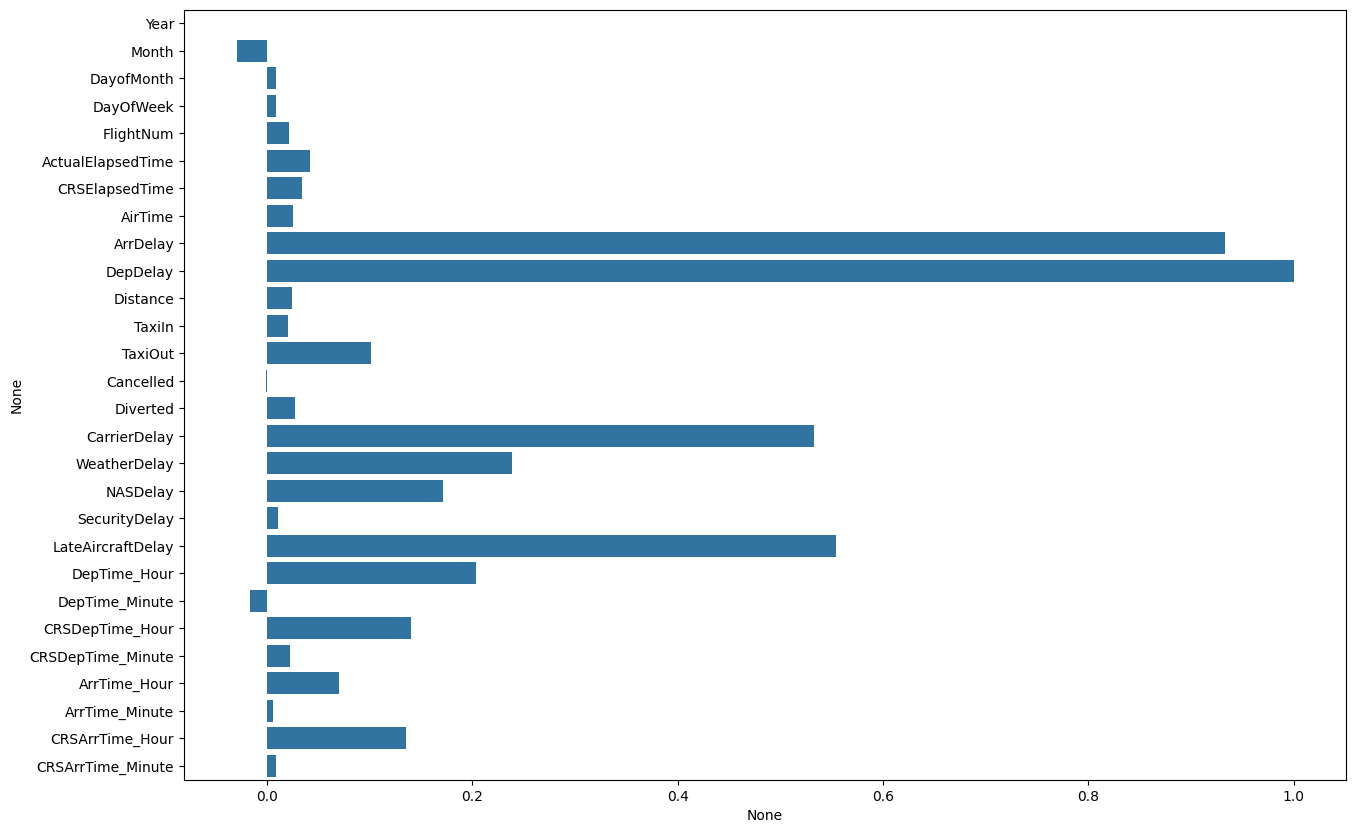

In [126]:
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns

correlations = df[numeric_features].corrwith(df_with_target['DepDelay']) 

plot = sns.barplot(y=numeric_features, x=correlations)
plot.figure.set_size_inches(15, 10)

In [127]:
df = df.drop(['CarrierDelay', 'WeatherDelay', 'Cancelled', 'ArrDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'TailNum', 'Year'], axis=1)
df

,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Origin,...,TaxiOut,Diverted,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,6,18,3,WN,242,57.0,65.0,46.0,16.0,MDW,...,8.0,0,21.0,11.0,20,55,23.0,8.0,23,0
1,6,4,3,XE,2380,124.0,138.0,108.0,16.0,IAH,...,12.0,0,14.0,26.0,14,10,17.0,30.0,17,28
2,8,3,7,WN,1769,138.0,155.0,125.0,-2.0,MDW,...,9.0,0,11.0,43.0,11,45,15.0,1.0,15,20
3,1,23,3,OO,3802,102.0,111.0,79.0,-3.0,SLC,...,19.0,0,11.0,41.0,11,44,13.0,23.0,13,35
4,5,4,7,WN,399,148.0,160.0,136.0,-5.0,LAS,...,8.0,0,8.0,15.0,8,20,12.0,43.0,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,1,26,6,OH,5218,110.0,113.0,85.0,-5.0,CVG,...,13.0,0,9.0,20.0,9,25,11.0,10.0,11,18
69995,5,12,1,DL,794,128.0,129.0,86.0,-11.0,ORD,...,20.0,0,18.0,29.0,18,40,21.0,37.0,21,49
69996,5,11,7,OO,6159,47.0,49.0,30.0,24.0,ORD,...,13.0,0,11.0,49.0,11,25,13.0,36.0,13,14
69998,2,18,1,NW,641,234.0,219.0,192.0,6.0,RSW,...,22.0,0,19.0,6.0,19,0,22.0,0.0,21,39


**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

<Axes: >

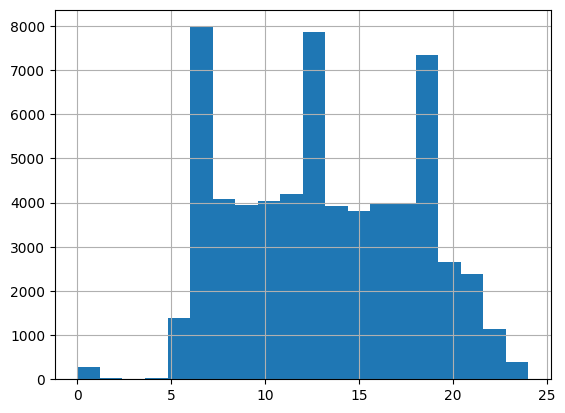

In [128]:
df['DepTime_Hour'].hist(bins=20)

<Axes: >

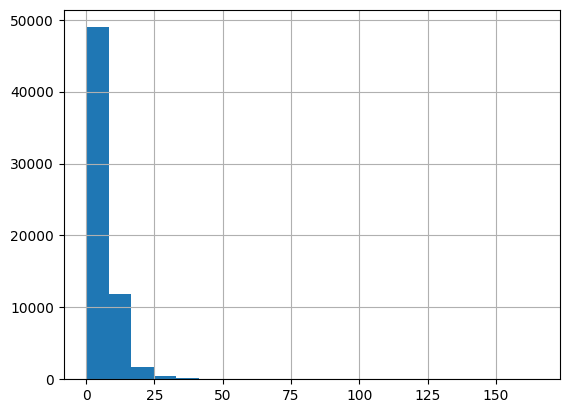

In [129]:
df['TaxiIn'].hist(bins=20)

<Axes: >

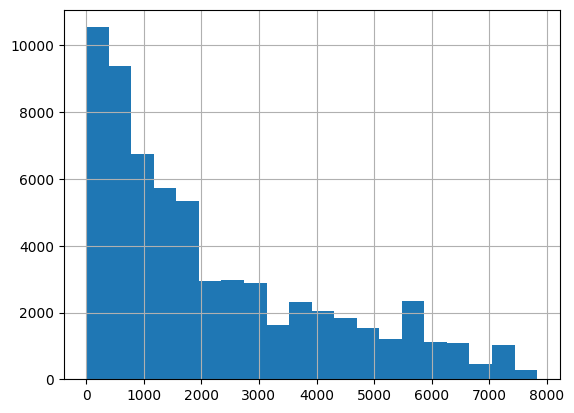

In [130]:
df['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [131]:
def transform_data(data):
    numeric_features = data.select_dtypes(include=['float64', 'int64']).columns 
    data[numeric_features] = data[numeric_features].fillna(0)                   
    scaler = StandardScaler()
    data[numeric_features] = scaler.fit_transform(data[numeric_features])       
    
    categorical_features = data.select_dtypes(include=['object']).columns       
    data[categorical_features] = data[categorical_features].fillna('nan')       
    data = pd.get_dummies(data)                                                 
    return data

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [132]:
df = transform_data(df)
df

,Month,DayofMonth,DayOfWeek,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,TaxiIn,...,Dest_TYR,Dest_TYS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM
0,-0.118281,0.256485,-0.462767,-0.991600,-0.988979,-0.916826,-0.849307,0.144971,-0.744130,-0.786908,...,False,False,False,False,False,False,False,False,False,False
1,-0.118281,-1.332050,-0.462767,0.106546,-0.040552,0.127377,0.064301,0.144971,0.183961,-0.582387,...,False,False,False,False,False,False,False,False,False,False
2,0.467662,-1.445517,1.541454,-0.207284,0.157627,0.370547,0.314806,-0.354394,0.471018,-0.582387,...,False,False,False,False,False,False,False,False,False,False
3,-1.583137,0.823819,-0.462767,0.836931,-0.351976,-0.258835,-0.363032,-0.382136,-0.347886,-0.582387,...,False,False,False,False,False,False,False,False,False,False
4,-0.411252,-1.332050,1.541454,-0.910960,0.299183,0.442068,0.476898,-0.437621,0.634799,-0.582387,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,-1.583137,1.164220,1.040399,1.564234,-0.238731,-0.230227,-0.274618,-0.437621,-0.120706,1.053782,...,False,False,False,False,False,False,False,False,False,False
69995,-0.411252,-0.424316,-1.464878,-0.708075,0.016071,-0.001361,-0.259882,-0.604076,-0.217566,3.098994,...,False,False,False,False,False,False,False,False,False,False
69996,-0.411252,-0.537783,1.541454,2.047563,-1.130535,-1.145693,-1.085076,0.366910,-1.043514,-0.582387,...,False,False,False,False,False,False,False,False,False,False
69998,-1.290166,0.256485,-1.464878,-0.786661,1.516567,1.286013,1.302092,-0.132454,1.208912,2.689951,...,False,False,False,False,False,False,False,False,False,False


In [133]:
target_feature = df[target_col]
df = df.drop(target_col, axis=1)
df

,Month,DayofMonth,DayOfWeek,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,Distance,TaxiIn,TaxiOut,...,Dest_TYR,Dest_TYS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM
0,-0.118281,0.256485,-0.462767,-0.991600,-0.988979,-0.916826,-0.849307,-0.744130,-0.786908,-0.741204,...,False,False,False,False,False,False,False,False,False,False
1,-0.118281,-1.332050,-0.462767,0.106546,-0.040552,0.127377,0.064301,0.183961,-0.582387,-0.389769,...,False,False,False,False,False,False,False,False,False,False
2,0.467662,-1.445517,1.541454,-0.207284,0.157627,0.370547,0.314806,0.471018,-0.582387,-0.653345,...,False,False,False,False,False,False,False,False,False,False
3,-1.583137,0.823819,-0.462767,0.836931,-0.351976,-0.258835,-0.363032,-0.347886,-0.582387,0.225242,...,False,False,False,False,False,False,False,False,False,False
4,-0.411252,-1.332050,1.541454,-0.910960,0.299183,0.442068,0.476898,0.634799,-0.582387,-0.741204,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,-1.583137,1.164220,1.040399,1.564234,-0.238731,-0.230227,-0.274618,-0.120706,1.053782,-0.301910,...,False,False,False,False,False,False,False,False,False,False
69995,-0.411252,-0.424316,-1.464878,-0.708075,0.016071,-0.001361,-0.259882,-0.217566,3.098994,0.313101,...,False,False,False,False,False,False,False,False,False,False
69996,-0.411252,-0.537783,1.541454,2.047563,-1.130535,-1.145693,-1.085076,-1.043514,-0.582387,-0.301910,...,False,False,False,False,False,False,False,False,False,False
69998,-1.290166,0.256485,-1.464878,-0.786661,1.516567,1.286013,1.302092,1.208912,2.689951,0.488818,...,False,False,False,False,False,False,False,False,False,False


In [134]:
target_feature

0        0.144971
1        0.144971
2       -0.354394
3       -0.382136
4       -0.437621
           ...   
69994   -0.437621
69995   -0.604076
69996    0.366910
69998   -0.132454
69999   -0.326651
Name: DepDelay, Length: 63404, dtype: float64

**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)).

In [196]:
y = target_feature
X = df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=54)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [197]:
def metrics(y, y_pred):
    R2 = r2_score(y, y_pred)
    MSE = mean_squared_error(y, y_pred)
    return R2, MSE

In [198]:
X_train_loc, X_test_loc, y_train_loc, y_test_loc = train_test_split(X_train, 
                                                                    y_train, 
                                                                    train_size = 1000, 
                                                                    random_state = 42)

model = LinearRegression().fit(X_train_loc, y_train_loc)

y_train_loc_pred = model.predict(X_train_loc)
y_pred = model.predict(X_test)

R2_train, MSE_train = metrics(y_train_loc, y_train_loc_pred)
R2_test, MSE_test = metrics(y_test, y_pred)
nonzero_weights = np.sum(abs(model.coef_) < pow(10, -10))

print(f'Metrics for train data:\nR^2 = {R2_train}\nMSE = {MSE_train}\n\n\
Metrics for test data:\nR^2 = {R2_test}\nMSE = {MSE_test}')
print(f'\nPercent of Zero weights: {(nonzero_weights/len(model.coef_)) * 100}')

Metrics for train data:
R^2 = 0.4398444122648897
MSE = 0.70445518285663

Metrics for test data:
R^2 = -8.396782087074285e+19
MSE = 8.217411708151887e+19

Percent of Zero weights: 30.963665086887836


Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

__18. (1 балл) __ Обучение линейной регрессии.



Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов).

In [199]:
model_lasso = Lasso()
model_lasso.fit(X_train_loc, y_train_loc)

model_ridge = Ridge()
model_ridge.fit(X_train_loc, y_train_loc)


weights_lasso = np.sum(abs(model_lasso.coef_) < pow(10, -7))
weights_ridge = np.sum(abs(model_ridge.coef_) < pow(10, -7))

print(f'Count of zero coef from Lasso: {weights_lasso}\n\
Count of zero coef from Ridge: {weights_ridge}')

Count of zero coef from Lasso: 633
Count of zero coef from Ridge: 273


Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

In [200]:
log_grid = np.logspace(-3, 3, 20)
weights_lasso = []
weights_ridge = []

for alpha in log_grid:
    model_lasso = Lasso(alpha)
    model_lasso.fit(X_train_loc, y_train_loc)
    weights_lasso.append(np.sum(np.absolute(model_lasso.coef_) < pow(10, -7)))

    model_ridge = Ridge(alpha)
    model_ridge.fit(X_train_loc, y_train_loc)
    weights_ridge.append(np.sum(np.absolute(model_ridge.coef_) < pow(10, -7)))

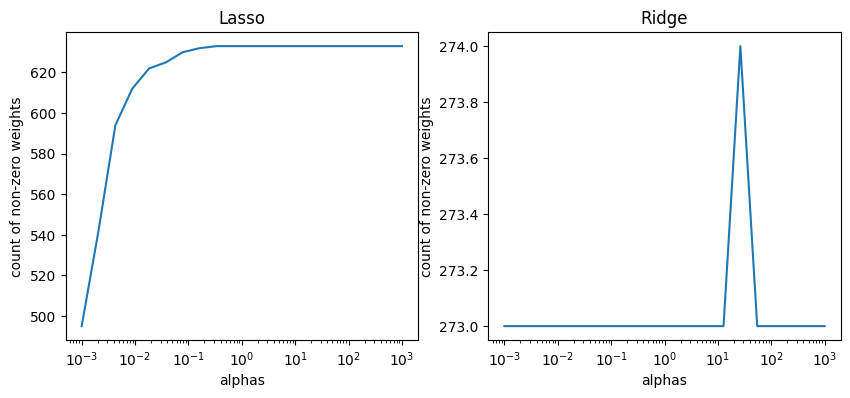

In [201]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

alphas = log_grid
title = ['Lasso', 'Ridge']
model = [weights_lasso, weights_ridge]

for i in range(2):
    ax[i].plot(alphas, model[i])
    ax[i].set_title(label=title[i])
    ax[i].set_xlabel("alphas")
    ax[i].set_xscale('log')
    ax[i].set_ylabel("count of non-zero weights")

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [202]:
def metrics_2(y, y_pred):
    R2 = r2_score(y, y_pred)
    RMSE = mean_squared_error(y, y_pred, squared=False)
    MAE = mean_absolute_error(y_train, y_train_pred)
    return R2, RMSE, MAE
    

In [203]:
model_ridge = Ridge()
model_ridge.fit(X_train_loc, y_train_loc)

y_train_pred = model_ridge.predict(X_train)
y_pred = model_ridge.predict(X_test)

R2_train, RMSE_train, MAE_train = metrics_2(y_train, y_train_pred)
R2_test, RMSE_test, MAE_test = metrics_2(y_test, y_pred)

print(f'Metrics for train data:\nR^2 = {R2_train}\nRMSE = {RMSE_train}\n\
MAE = {MAE_train}\n\nMetrics for test data:\nR^2 = {R2_test}\n\
RMSE = {RMSE_test}\nMAE = {MAE_test}')


Metrics for train data:
R^2 = -0.15469266945638083
RMSE = 1.0794682481386817
MAE = 0.6217511790620883

Metrics for test data:
R^2 = -0.17712811143663143
RMSE = 1.073304493719749
MAE = 0.6217511790620883


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).

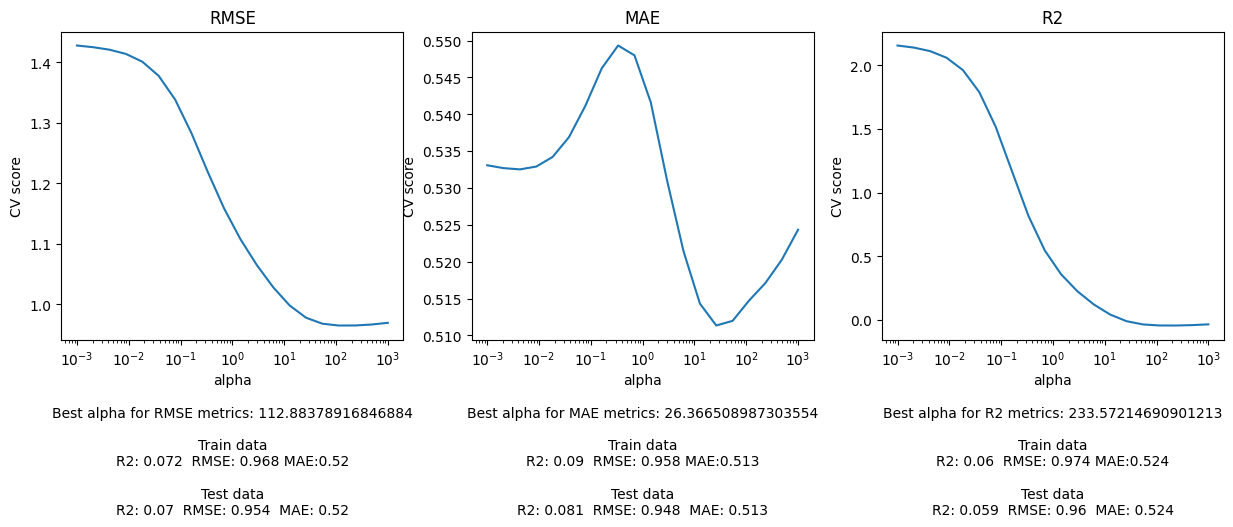

In [214]:
from sklearn.model_selection import GridSearchCV, KFold

quantity = 1000
X_train_loc, y_train_loc = X_train[:quantity], y_train[:quantity]

scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2']
title = ['RMSE', 'MAE', 'R2']
kf = KFold(n_splits=5)
alpha = np.logspace(-3, 3, 20)

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

for i in range(3):
    gridsearch = GridSearchCV(Ridge(), 
                            [{'alpha': alpha}], 
                            scoring=scoring[i], 
                            cv = kf)
    
    gridsearch.fit(X_train_loc, y_train_loc)
    best_alpha = gridsearch.best_params_['alpha']

    ax[i].plot(alpha, -gridsearch.cv_results_["mean_test_score"])
    ax[i].set_xscale("log")
    ax[i].set_ylabel("CV score")
    ax[i].set_title(title[i])
    
    model_ridge = Ridge(best_alpha)
    model_ridge.fit(X_train_loc, y_train_loc)
    y_train_pred = model_ridge.predict(X_train)
    y_pred = model_ridge.predict(X_test)
    R2_train, RMSE_train, MAE_train = metrics_2(y_train, y_train_pred)
    R2_test, RMSE_test, MAE_test = metrics_2(y_test, y_pred)
    
    ax[i].set_xlabel(f'alpha\n\nBest alpha for {title[i]} metrics: {best_alpha}\n\n\
Train data\nR2: {round(R2_train, 3)}  RMSE: {round(RMSE_train, 3)} MAE:\
{round(MAE_train, 3)}\n\nTest data\nR2: {round(R2_test, 3)}  RMSE: {round(RMSE_test, 3)}  \
MAE: {round(MAE_test, 3)}')

__19. (0.5 балла)__ Поиск объектов-выбросов


Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

0.9026188379792297

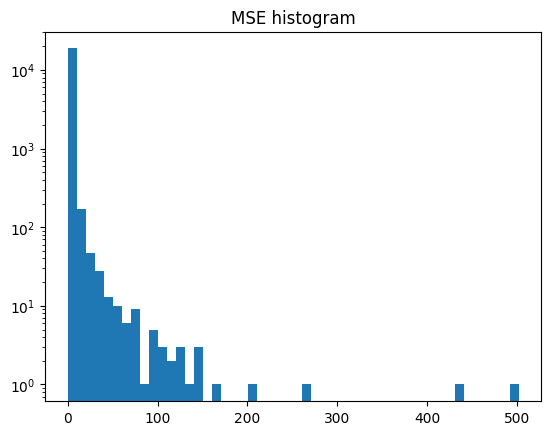

In [205]:
from sklearn.model_selection import cross_val_predict

ridge = Ridge()
y_pred = cross_val_predict(ridge, X_test, y_test)
mse = (y_test - y_pred) ** 2
plt.hist(mse, bins = 50)
plt.yscale("log")
plt.title("MSE histogram")
mean_squared_error(y_test, y_pred)